In [194]:
# !pip install pandas

In [195]:
# !pip install numpy
# !pip install sklearn
# !pip install statsmodels
# !pip install seaborn
# !pip install matplotlib
# !pip install imblearn

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [197]:
import pandas as pd

In [198]:
df = pd.read_csv("gender_classification_v7 (1).csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [199]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [200]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

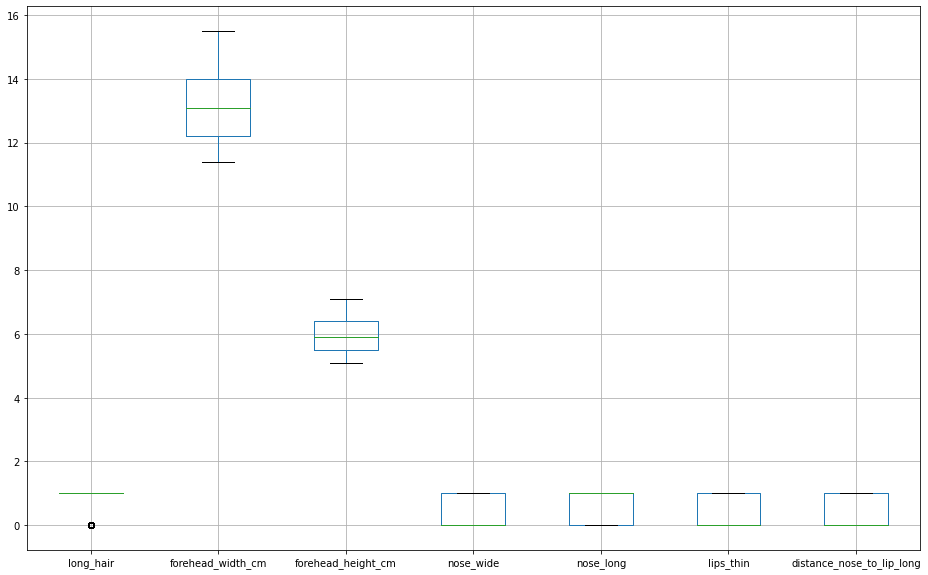

In [201]:
plt.figure(figsize =(16,10))
df.boxplot()

<AxesSubplot:xlabel='long_hair', ylabel='gender'>

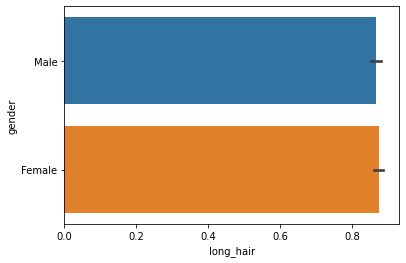

In [202]:
sns.barplot(y = "gender", x = "long_hair", data = df)


In [203]:
#Above graph shows that long hair has the same effect on both male and female

<AxesSubplot:xlabel='forehead_width_cm', ylabel='gender'>

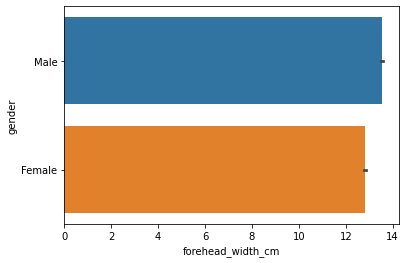

In [204]:
sns.barplot(y = "gender", x = "forehead_width_cm", data = df)


In [205]:
#The above shows that forehead with has more effect in male than female

<AxesSubplot:xlabel='forehead_height_cm', ylabel='gender'>

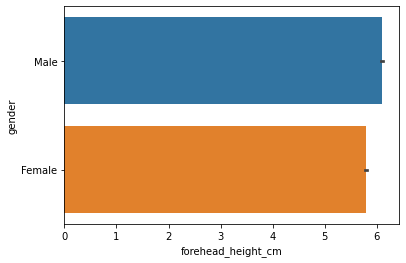

In [206]:
sns.barplot(y = "gender", x = "forehead_height_cm", data = df)


In [207]:
# Males have more forehead height than female

<AxesSubplot:xlabel='nose_wide', ylabel='gender'>

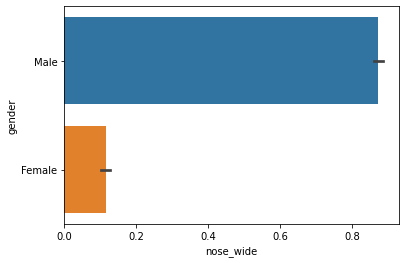

In [208]:
sns.barplot(y = "gender", x = "nose_wide", data = df)


In [209]:
#The graph shows that alot more males have wider nose than female

<AxesSubplot:xlabel='nose_long', ylabel='gender'>

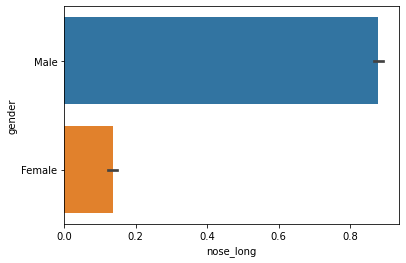

In [210]:
sns.barplot(y = "gender", x = "nose_long", data = df)


In [211]:
#The graph shows that alot more males have longer nose than female

<AxesSubplot:xlabel='lips_thin', ylabel='gender'>

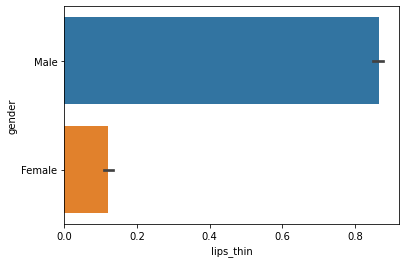

In [212]:
sns.barplot(y = "gender", x = "lips_thin", data = df)


In [213]:
#The graph shows that alot more males have thinner lips than female

<AxesSubplot:xlabel='distance_nose_to_lip_long', ylabel='gender'>

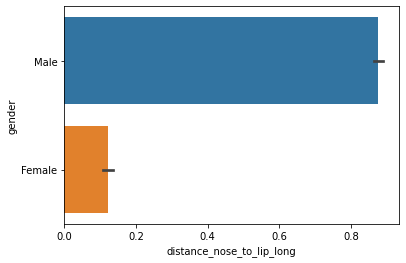

In [214]:
sns.barplot(y = "gender", x = "distance_nose_to_lip_long", data = df)


In [215]:
#The graph shows that more males have "distance nose to lip long" than femaies

In [216]:
categ = []
for change in range(len(df['gender'])):
    if df['gender'][change] == 'Male':
        categ.append(1)
    else:
        df['gender'][change] == 'Female'
        categ.append(0)
df['gender1'] = categ

In [217]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender1
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,0
4997,1,11.9,5.4,0,0,0,0,Female,0
4998,1,12.9,5.7,0,0,0,0,Female,0
4999,1,13.2,6.2,0,0,0,0,Female,0


In [218]:
df = df.drop(columns = ['gender'])
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender1
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


<AxesSubplot:>

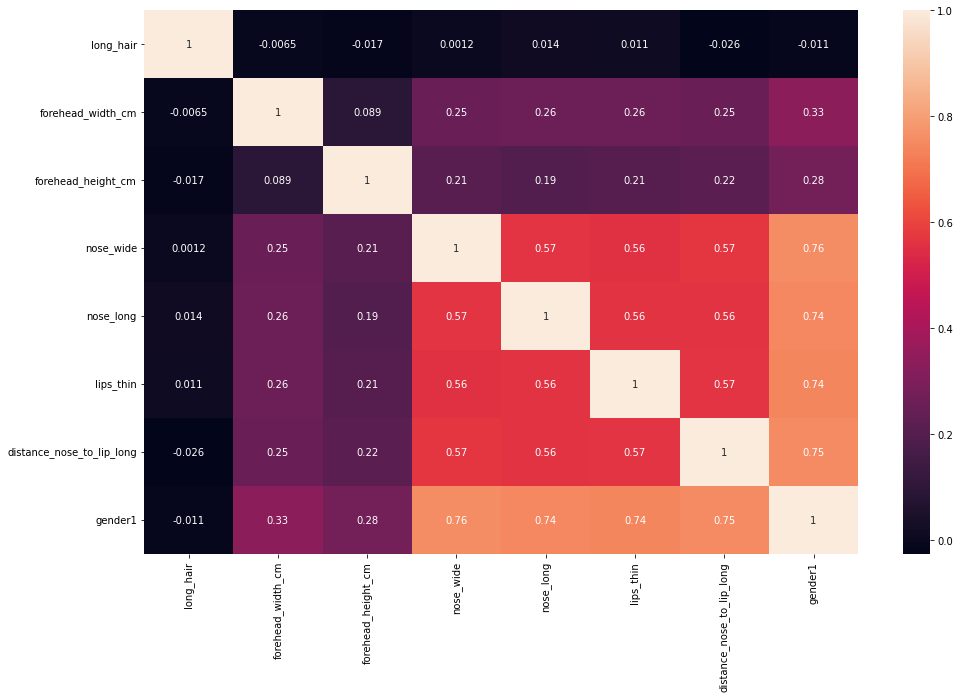

In [219]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True)

In [220]:
y = df['gender1']
x = df.drop(columns = ['gender1'])

In [221]:
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [222]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender1, Length: 5001, dtype: int64

In [223]:
x.shape

(5001, 7)

In [224]:
y.shape

(5001,)

In [225]:
#x_train, y_train, x_test, y_test = train_test_split(x, y, test_size = 20, random_state = 45, train_size = .80)

In [226]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Scaler = MinMaxScaler()
norm_x_train = pd.DataFrame(Scaler.fit_transform(x))

x_train, x_test, y_train, y_test = train_test_split(norm_x_train, y, test_size=.20, random_state = 45)

In [227]:
val_x_train, val_x_test, val_y_train, val_y_test = train_test_split(x_train, y_train, test_size = .20, random_state = 45)

In [228]:
val_x_train

,0,1,2,3,4,5,6
406,0.0,0.902439,0.95,1.0,1.0,1.0,1.0
2467,1.0,0.268293,0.80,1.0,1.0,1.0,1.0
1224,1.0,0.317073,0.40,0.0,1.0,0.0,0.0
4635,1.0,0.634146,0.25,0.0,0.0,0.0,0.0
4555,0.0,0.292683,0.15,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
4475,1.0,0.780488,0.45,1.0,1.0,1.0,0.0
15,0.0,0.268293,0.05,1.0,1.0,1.0,1.0
3956,1.0,0.926829,0.45,1.0,0.0,1.0,1.0
2275,1.0,0.268293,0.10,1.0,0.0,0.0,0.0


In [183]:
val_x_train.shape

(3200, 7)

In [184]:
val_y_train.shape

(3200,)

In [185]:
pca = PCA(n_components = 7)
model = pca.fit(x_train)
print(model.explained_variance_ratio_)

[0.54430101 0.09344458 0.0878427  0.08550071 0.08325148 0.05408921
 0.05157031]


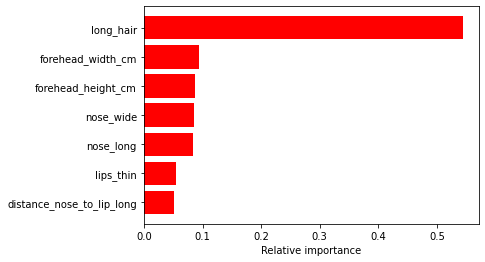

In [186]:
features = df.columns
importance = model.explained_variance_ratio_
indices = np.argsort(importance)[-10:]
plt.barh(range(len(indices)), importance[indices], color = 'red', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [187]:
model = LogisticRegression()
work = model.fit(val_x_train, val_y_train)
work

LogisticRegression()

In [188]:
coef_deter = work.score(val_x_train, val_y_train)
coef_deter

0.9696875

In [189]:
1 - (1 - work.score(val_x_train, val_y_train))*(len(val_y_train - 1))/(len(val_y_train)- val_x_train.shape[1]-1)


0.9696115288220551

In [190]:
y_predict = work.predict(val_x_test)

In [191]:
from sklearn.metrics import confusion_matrix

In [192]:
cf_matrix = confusion_matrix(val_y_test, y_predict)
cf_matrix

array([[373,   9],
       [ 17, 401]], dtype=int64)

In [237]:
from sklearn.model_selection import RepeatedKFold

In [238]:
cv = RepeatedKFold(n_splits = 10)

In [242]:
RepeatedKFold(n_repeats =4, n_splits =10, random_state =1)

RepeatedKFold(n_repeats=4, n_splits=10, random_state=1)

In [245]:
from sklearn.model_selection import cross_val_score

In [246]:
score = cross_val_score(work, val_x_test, val_y_test, scoring ='accuracy', cv =cv, n_jobs =1, error_score='raise')
np.mean(score)

0.96175

In [248]:
val_x_test.shape

(800, 7)